In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import scipy.io.wavfile as wav
from scipy.signal import resample
from IPython.display import Audio
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('bmh')

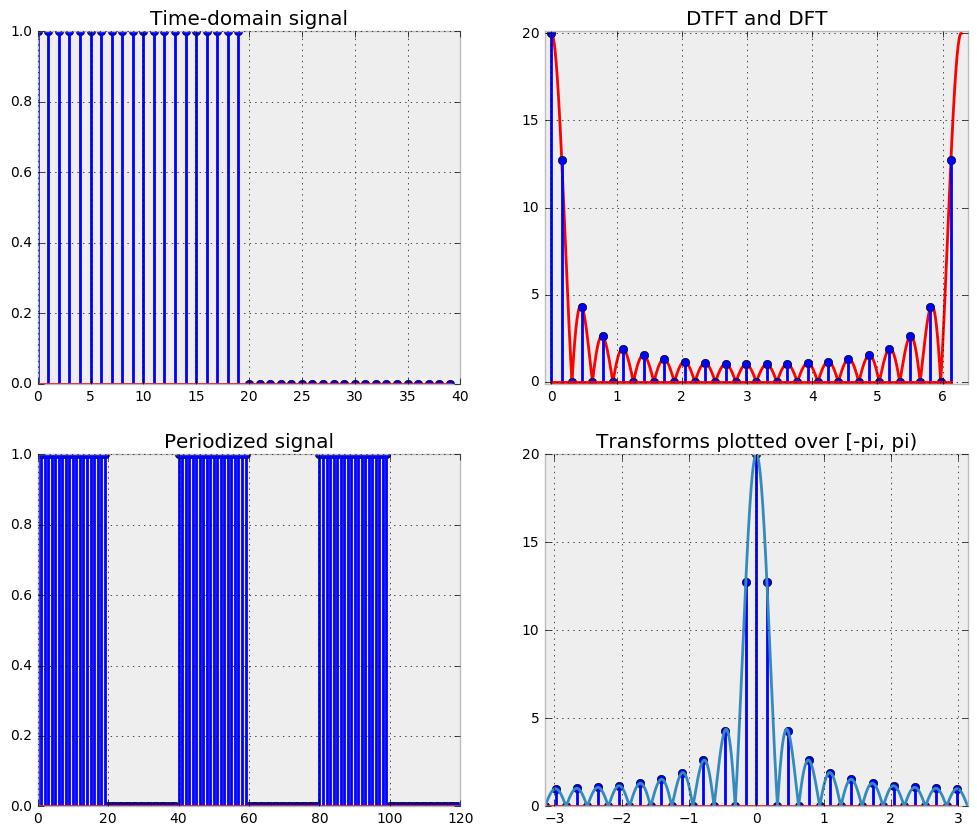

In [18]:
# DTFT and DFT of square waves with varying number of samples
#---------------------------------------------------------------------------

# number of ones
M = 20

# total length of the signals (for DFT)
N = 40

# time-domain index
n_idx = np.arange(N)

# frequency vector for DTFT 
omega = np.linspace(0, 2*np.pi, 1e4)

# the rect wave
x = np.vstack((np.ones((M, 1)), np.zeros((N - M, 1))))

# simulate DTFT by doing DFT with a large number of samples
X_dtft = np.fft.fft(x, n=len(omega), axis=0)

# take the DTFT
X_dft = np.fft.fft(x, n=N, axis=0)

# do some plotting
fig = plt.figure(figsize=(12, 10))


# original signal
#---------------------------------------------------------------------------

ax = fig.add_subplot(221)
plt.stem(x)
plt.title('Time-domain signal')


# transforms
#---------------------------------------------------------------------------

ax = fig.add_subplot(222)
plt.plot(omega, np.abs(X_dtft), 'r')

# note the scaling of the frequency axis
plt.stem(2*np.pi/N * n_idx, np.abs(X_dft))

plt.xlim(-0.1, 2*np.pi + 0.1)
plt.ylim(-0.1, M+0.1)
plt.title('DTFT and DFT')


# periodized signal
#---------------------------------------------------------------------------

ax = fig.add_subplot(223)
plt.stem(np.vstack((x, x, x)))
plt.title('Periodized signal')


# transforms plotted from -pi to pi
#---------------------------------------------------------------------------

ax = fig.add_subplot(224)

if N % 2 == 0:
    shift = N / 2
else:
    shift = (N - 1) / 2
        
plt.stem(2*np.pi/N * (n_idx - shift), np.fft.fftshift(np.abs(X_dft)))
plt.plot(omega - np.pi, np.fft.fftshift(np.abs(X_dtft)))
_ = plt.xlim(-np.pi, np.pi)
plt.title('Transforms plotted over [-pi, pi)')




(-3.141592653589793, 3.141592653589793)

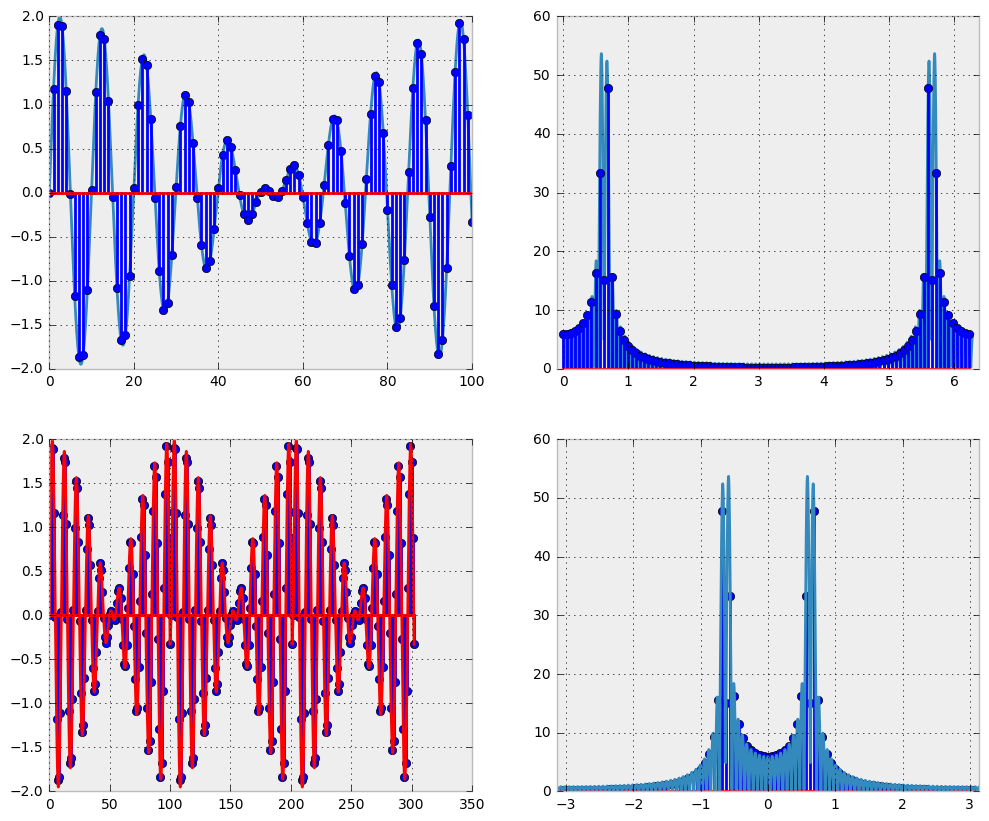

In [112]:
# DTFT and DFT of square waves with varying number of samples
#---------------------------------------------------------------------------

omega0 = 0.6
N = 101
N_fft = 101
n_idx = np.arange(N)
k_idx = np.arange(N_fft)
t = np.linspace(0, N-1, 1e4)

# x = np.sin(omega0*n_idx)
# x_c = np.sin(omega0*t)

x = np.sin(omega0*n_idx) + np.sin(omega0*1.1*n_idx)
x_c = np.sin(omega0*t) + np.sin(omega0*1.1*t)


# simulate DTFT by a huge number of samples
omega = np.linspace(0, 2*np.pi, 1e4)

X_dtft = np.fft.fft(x, n=len(omega), axis=0)
X_dft = np.fft.fft(x, n=N_fft, axis=0)

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(221)
plt.plot(t, x_c)
plt.stem(n_idx, x)

ax = fig.add_subplot(222)
plt.plot(omega, np.abs(X_dtft))
plt.stem(2*np.pi/N_fft * k_idx, np.abs(X_dft))

plt.xlim(-0.1, 2*np.pi + 0.1)
ax = fig.add_subplot(223)
plt.stem(np.hstack((n_idx, n_idx+N, n_idx+2*N)), np.hstack((x, x, x)))
plt.plot(np.hstack((t, t+N, t+2*N)), np.hstack((x_c, x_c, x_c)), 'r')

ax = fig.add_subplot(224)
plt.stem(2*np.pi/N_fft * (k_idx - (N_fft-1)/2), np.fft.fftshift(np.abs(X_dft)))
plt.plot(omega - np.pi, np.fft.fftshift(np.abs(X_dtft)))
plt.xlim(-np.pi, np.pi)


In [133]:
q = np.array([])

for i in range(10000):
    q = np.hstack((q, x.flatten()))

In [135]:
Audio(q, rate=16000)

In [122]:
x.shape

(10, 1)

In [123]:
q.shape

(0,)